# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB
!./APlusB

^C


### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Writing output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./APlusB < input1.txt

12

In [ ]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

Traceback (most recent call last):
  File "/content/sum.py", line 7, in <module>
    a, b = map(int, input().split())
KeyboardInterrupt
^C


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

^C


### Test 1: Small numbers

In [ ]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [ ]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [ ]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [ ]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long and conpare equal numbers

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
          if(numbers[first] != numbers[second]){
            aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
          }
			       
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
4600000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [ ]:
%%writefile test3.cpp
#include <iostream>
#include <vector>
#include <algorithm>


using namespace std;

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
          if(numbers[first] != numbers[second]){
            aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
          }
			       
        }
    }

    return max_product;
}

int main(){
  srand(time(NULL));
  for (int i = 0 ; i < 20; i ++){
    int tamano = rand()%19 +2 ;
    std::vector <int> numeros(tamano); 
    for (int j = 0; j < tamano ; j++){
      numeros[j] = rand()%10;
    }
    cout<<MaxPairwiseProduct(numeros)<<endl;
  }
}

Writing test3.cpp


In [ ]:
!g++ test3.cpp -o test3
!./test3

72
72
72
72
72
56
72
48
72
72
42
72
72
72
56
56
48
9
72
20


### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [ ]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [ ]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

^C


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [ ]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                      //1
    std::vector<int> numbers(n);     //n                                       
    for (int i = 0; i < n; ++i) {    //n                                      
        std::cout << numbers[i];     //1                                        
    }

    std::cout << "\n";               //1       
    return 0;                        //1                                      
}                                    //1+n+(1*n)+1+1 = 2n+3 = O()

Writing test_init_vectors.cpp


In [ ]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Writing max_pairwise_product_long_execints.cpp


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;
long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    execints++;

    long long max_product = (long long)numbers[0];                           //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 1; first < n; ++first) {                                //1+2n
        execints+=2;

        long long aux = std::max(max_product,(long long)numbers[first]);     //n
        execints++;
        long long aux1 = std::max(aux_product,(long long)numbers[first]);    //n
        execints++;

        if ( aux > max_product){                                             //n
          aux_product = max_product;                                         //[0,n]
          max_product = aux;                                                 //[0,n]
          execints+=3;
        }
        if (aux1 > aux_product && aux1 != max_product){                     //n
          aux_product = aux1;                                               //[0,n]]
          execints+=2;
        }

    }
    max_product = max_product*aux_product;                                 //1                                                           // -------------- 
    execints++;
    return max_product;                                            // 5 + (1+2n) + 6n + 3[0,n]
}

int main() {
    long long execints =0LL;                                 //1
    execints++;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];                              //n
        execints++;
    }
    
    int M = MaxPairwiseProduct(numbers,execints);            //5 + (1+2n) + 6n + 3[0,n]
    execints++;
    
    std::cout <<  "Execints "<<execints << "\n";                       
    return 0;                                                // 10 + 12n + 3[0,n] 
} 

Overwriting max_pairwise_product_long_execints.cpp


Test with inputs 1 and 2



In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!time ./max_pairwise_product_long_execints < input1.txt
!time ./max_pairwise_product_long_execints < input2.txt 

Execints 113

real	0m0.001s
user	0m0.001s
sys	0m0.000s
Execints 64

real	0m0.002s
user	0m0.001s
sys	0m0.000s


Test and time it with input 3

In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!time ./max_pairwise_product_long_execints < input3.txt 

Execints 2200003

real	0m0.053s
user	0m0.050s
sys	0m0.002s


20 stress tests

In [ ]:
%%writefile test3.cpp
#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    execints++;

    long long max_product = (long long)numbers[0];                           //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 1; first < n; ++first) {                                //1+2n
        execints+=2;

        long long aux = std::max(max_product,(long long)numbers[first]);     //n
        execints++;
        long long aux1 = std::max(aux_product,(long long)numbers[first]);    //n
        execints++;

        if ( aux > max_product){                                             //n
          aux_product = max_product;                                         //[0,n]
          max_product = aux;                                                 //[0,n]
          execints+=3;
        }
        if (aux1 > aux_product && aux1 != max_product){                     //n
          aux_product = aux1;                                               //[0,n]]
          execints+=2;
        }

    }
    max_product = max_product*aux_product;                                 //1
    execints++;
    return max_product;                                            // 5 + (1+2n) + 6n + 3[0,n]
}

long long MaxPairwiseProductL(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
          if(numbers[first] != numbers[second]){
            aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
          }
			       
        }
    }

    return max_product;
}

int main(){
  long long excints = 0LL;

  srand(time(NULL));
  excints++;
  

  for (int i = 0 ; i < 20; i ++){
    excints+=2;
    int tamano = rand()%19 +2 ;
    excints++;

    std::vector <int> numeros(tamano);
    excints+=tamano;
    for (int j = 0; j < tamano ; j++){
      numeros[j] = rand()%10;
      cout<< numeros[j] << " ";
      excints++;
    }
    cout<<endl;
    int product1 = MaxPairwiseProduct(numeros,excints);
    int product2 = MaxPairwiseProductL(numeros);

    if (product1 == product2){
      cout<<"Ok"<<endl;
    }else{
      cout<<"Respuesta equivocada"<<endl;
    }
  }
  cout << "Excints " << excints << endl;
}

Overwriting test3.cpp


In [ ]:
!g++ test3.cpp -o test3
!time ./test3

0 3 0 2 1 0 0 0 7 8 5 0 7 9 2 1 0 4 7 5 
Ok
1 0 0 0 1 5 0 6 9 0 7 2 2 9 
Ok
4 1 8 3 0 3 4 7 
Ok
6 1 7 2 8 3 3 1 3 5 2 4 1 4 3 2 4 
Ok
5 9 1 3 5 4 
Ok
9 4 7 3 4 2 1 7 
Ok
4 7 4 9 8 0 7 
Ok
6 0 7 9 2 
Ok
9 9 2 2 2 8 9 6 
Ok
5 5 2 9 9 3 
Ok
0 9 3 5 1 
Ok
5 8 6 1 8 3 3 
Ok
7 4 2 9 7 4 9 6 2 8 1 9 
Ok
3 8 6 1 1 5 7 8 6 1 5 6 7 6 4 
Ok
9 7 0 4 9 1 3 5 1 1 0 9 4 9 0 
Ok
0 8 1 1 3 8 9 2 
Ok
4 8 0 
Ok
5 3 4 
Ok
3 0 3 5 5 0 8 6 
Ok
7 2 2 9 2 4 7 3 
Ok
Excints 1327

real	0m0.002s
user	0m0.002s
sys	0m0.000s


Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
0.004/113

3.5398230088495574e-05

In [ ]:
0.03/64

0.00046875

In [ ]:
0.067/2200003

3.045450392567647e-08

Calculate estimated time by instruction and number of instructions by second

In [ ]:
1/(0.004/113)

28250.0

In [ ]:
1/(0.03/64)

2133.3333333333335

In [ ]:
1/(0.067/2200003)

32835865.671641786

### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;                                               //1
    execints++;

    int n;                                                                 //1
    execints++;

    cin >> n;                                                              //1
    execints++;

    long long max_product = 0LL;                                           //1
    execints++;

	  long long aux_product = 0LL;                                           //1
    execints++;                                                           
    

    for (int i = 0 ; i < n ; i ++){                                        //2n+1
        int number;                                                        //n
        execints++;

        cin>>number;                                                       //n
        execints++;

        long long aux = max(max_product,(long long)number);                //n
        execints++;
        long long aux1 = max(aux_product,(long long)number);               //n
        execints++;

        if ( aux > max_product){                                           //(n-1)n/2 
          execints++;

          aux_product = max_product;                                       //[0,(n-1)n/2 ]
          max_product = aux;                                               //[0,(n-1)n/2 ]
          execints+=2;
        }
        if (aux1 > aux_product && aux1 != max_product){                    //(n-1)n/2
          execints++;

          aux_product = aux1;                                              //[0,(n-1)n/2 ]
          execints++;
        }
    }
    max_product = max_product*aux_product;                                 //1
    execints++; 

    cout<< execints << endl;                     
    return 0;                                                              //7 + 6n + 2(n-1)n/2 + 3*[0,(n-1)n/2]
}        

Overwriting max_pairwise_product_long_execints.cpp


Test with inputs 1 and 2


 

In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!time ./max_pairwise_product_long_execints < input1.txt
!time ./max_pairwise_product_long_execints < input2.txt 

76

real	0m0.002s
user	0m0.001s
sys	0m0.001s
43

real	0m0.002s
user	0m0.002s
sys	0m0.000s


Test and time it with input 3

In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!time ./max_pairwise_product_long_execints < input3.txt 

1400006

real	0m0.087s
user	0m0.081s
sys	0m0.001s


20 stress tests 

In [ ]:
%%writefile test3.cpp
#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;

long long MaxPairwiseProductL(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
          if(numbers[first] != numbers[second]){
            aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
          }
			       
        }
    }

    return max_product;
}

int main() {

    srand(time(NULL));
    long long execints = 0LL;
    execints++;

    for (int j = 0 ; j < 20 ; j++){

      int n = rand()%19 +2;
      execints++;

      long long max_product = 0LL;
      execints++;

      long long aux_product = 0LL;
      execints++;                                                           
      
      vector <int> numeros(n);

      for (int i = 0 ; i < n ; i ++){
          int number = rand()%10;
          execints++;
          cout << number << " ";

          numeros[i] = number;

          long long aux = max(max_product,(long long)number);
          execints++;
          long long aux1 = max(aux_product,(long long)number);
          execints++;

          if ( aux > max_product){
            execints++;

            aux_product = max_product;
            max_product = aux;
            execints+=2;
          }
          if (aux1 > aux_product && aux1 != max_product){
            execints++;

            aux_product = aux1;
            execints++;
          }
      }
      cout<< endl;
      max_product = max_product*aux_product;   
      execints++;
      int product2 = MaxPairwiseProductL(numeros);

      if (max_product == product2){
        cout<< "Ok"<< endl;
      } else{
        cout<< "Respuesta incorrecta" <<endl;
      }
    }
    cout<<"Excints: " <<execints << endl;
    return 0;
}        

Overwriting test3.cpp


In [ ]:
!g++ test3.cpp -o test3
!time ./test3

4 2 2 1 1 1 4 2 7 7 
Ok
4 3 0 5 7 2 5 8 5 2 3 
Ok
2 0 
Ok
6 6 9 1 5 5 
Ok
9 6 7 1 2 9 8 1 2 5 
Ok
2 0 2 4 7 3 2 9 
Ok
8 1 
Ok
3 9 6 3 0 3 0 7 3 9 6 4 1 7 4 3 0 9 
Ok
4 1 2 1 8 7 3 9 6 1 
Ok
6 5 1 5 0 3 8 0 1 1 1 9 7 3 7 2 8 7 
Ok
8 1 5 2 4 5 0 7 5 6 9 9 4 6 1 
Ok
6 4 0 8 5 1 0 5 1 5 4 
Ok
5 3 8 5 6 5 7 1 1 9 
Ok
8 5 9 7 2 5 8 3 3 5 3 4 2 7 6 9 
Ok
3 3 3 8 6 3 
Ok
3 9 2 4 0 2 4 0 9 4 7 3 1 8 7 5 3 2 1 
Ok
1 7 5 1 0 0 6 0 7 0 5 2 9 9 
Ok
9 3 2 1 3 6 8 8 
Ok
8 5 5 3 0 6 9 1 3 6 5 5 6 1 7 5 1 
Ok
7 0 3 5 1 7 
Ok
Excints: 927

real	0m0.002s
user	0m0.001s
sys	0m0.001s


Count executed instructions in code and verify with inputs 1,2 and 3

In [ ]:
0.03/76

0.00039473684210526315

In [ ]:
0.002/43

4.651162790697675e-05

In [ ]:
0.55/1400006

3.9285545919088923e-07

Calculate estimated time by instruction and number of instructions by second

In [ ]:
1/(0.03/76)

2533.3333333333335

In [ ]:
1/(0.002/43)

21499.999999999996

In [ ]:
1/(0.55/1400006)

2545465.454545454

# Codeforces problem https://codeforces.com/contest/1619/problem/A 

Solve the problem in Colab, submit the solution to Codeforces and add a screenshoot of the submission.

In [ ]:
a = int(input())

for i in range(a):
    bandera = True
    b = list(input())
    if len(b) % 2 != 0:
        bandera = False
    else:
        c1 = b[:int(len(b)/2)]
        c2 = b[int(len(b)/2):]
        if c1 == c2:
            bandera = True
        else:
            bandera = False
    if bandera:
        print("YES")
    else:
        print("NO")


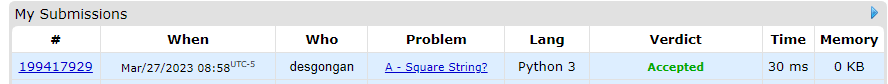